In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def smooth(scalars, weight=0.9):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

In [3]:
p_parent = '/home/harveyaa/Documents/masters/neuropsych_mtl/results'

p_out = '/home/harveyaa/Documents/masters/neuropsych_mtl/tmp/figures'

In [4]:
cases = ['ASD',
        'SZ',
        'BIP',
        'DEL22q11_2',
        'DUP22q11_2',
        'DEL16p11_2',
        'DUP16p11_2',
        'DEL1q21_1',
        'DUP1q21_1']

# MLP
## Single Task

In [5]:
results = {}
for case in cases:
    p = os.path.join(p_parent,'single_MLP',f'{case}')
    folds = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        folds.append(df)
    results[case] = folds

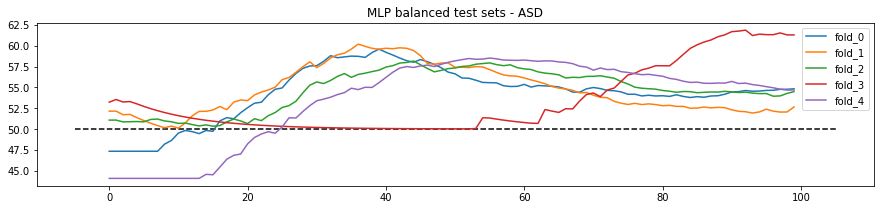

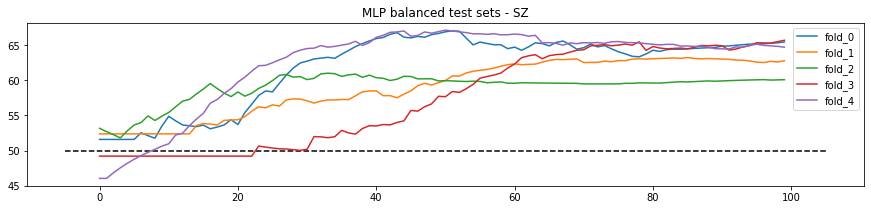

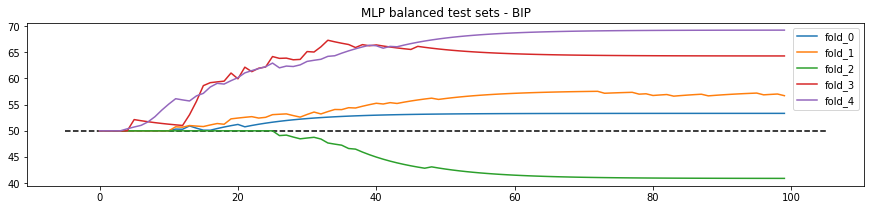

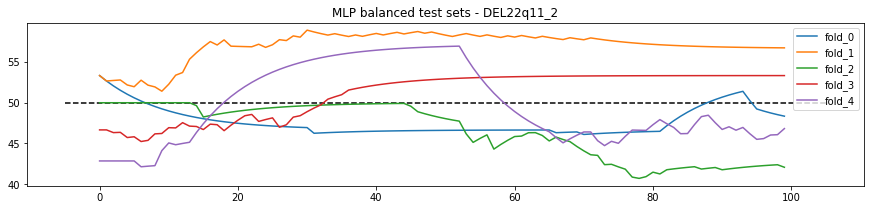

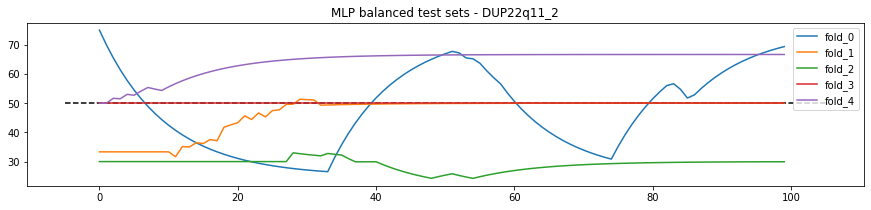

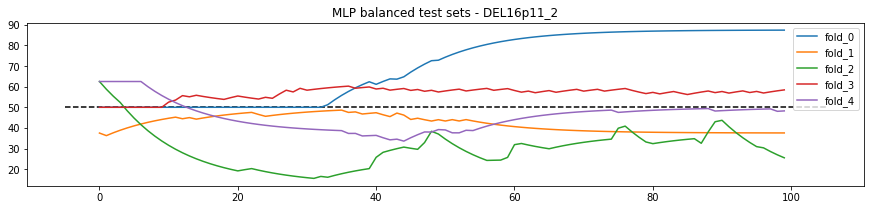

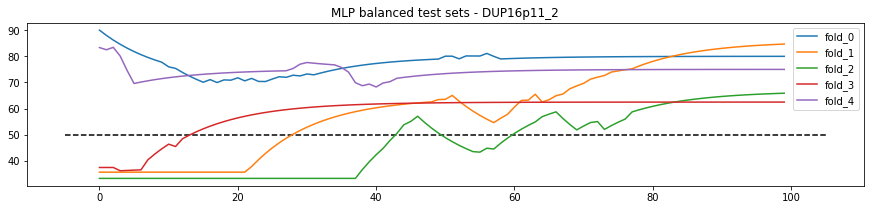

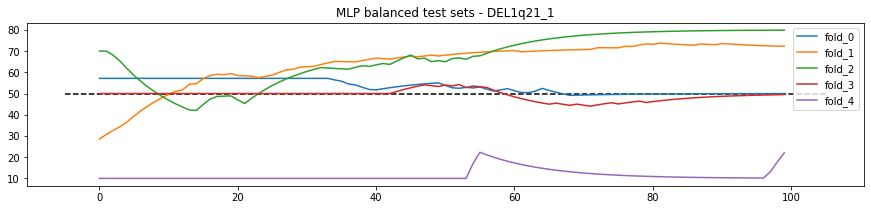

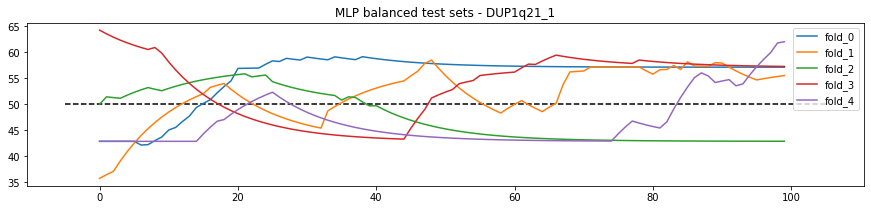

In [6]:
for case in results:
    plt.figure(figsize=(15,3))
    for i,df in enumerate(results[case]):
        sns.lineplot(x=df.index,y=smooth(df['Accuracy/test']),data=df,label=f'fold_{i}')
    plt.title(f'MLP balanced test sets - {case}')
    plt.hlines(50,-5,105,ls='--',color='black')
    #plt.savefig(os.path.join(p_out,f'mlp_balanced_{case}.png'))
    plt.show()

## Multi-task

In [7]:
n_folds = 5

p = os.path.join(p_parent,'all_MLP')
folds = []
for i in range(n_folds):
    p_fold = os.path.join(p,f'fold_{i}')
    file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
    df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])
    folds.append(df)

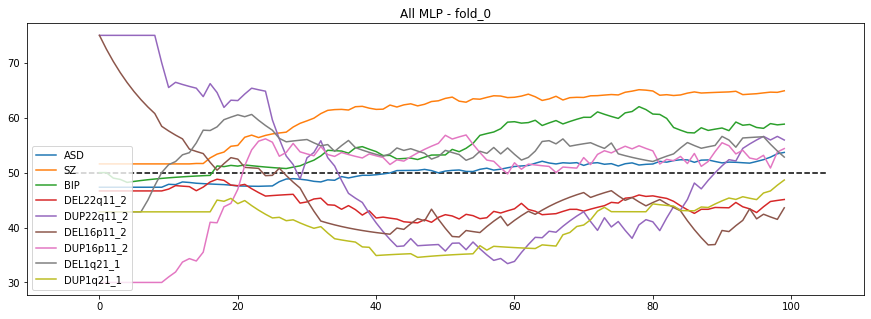

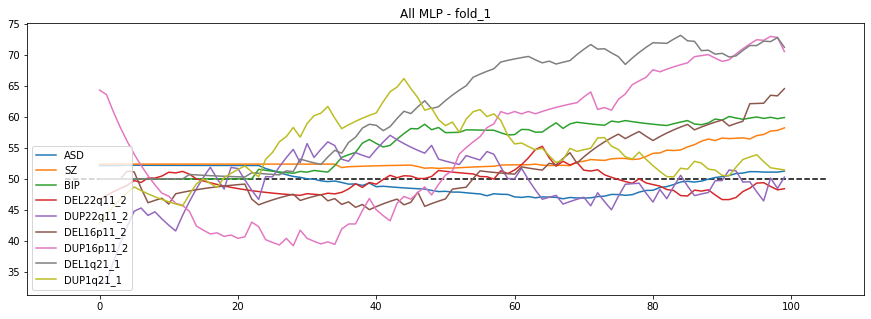

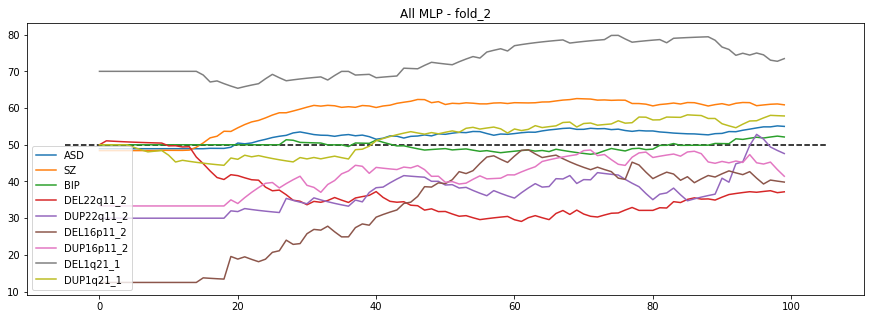

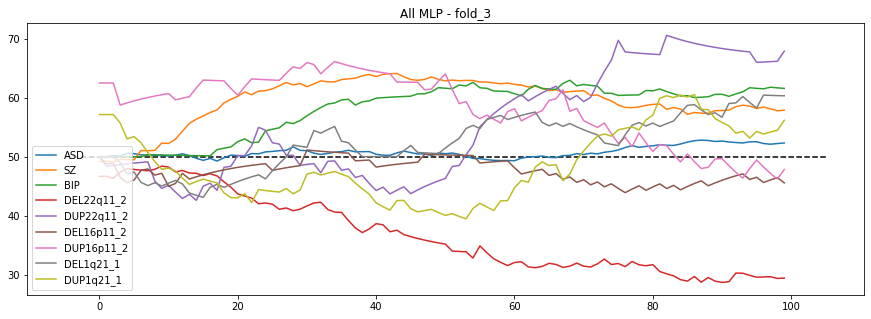

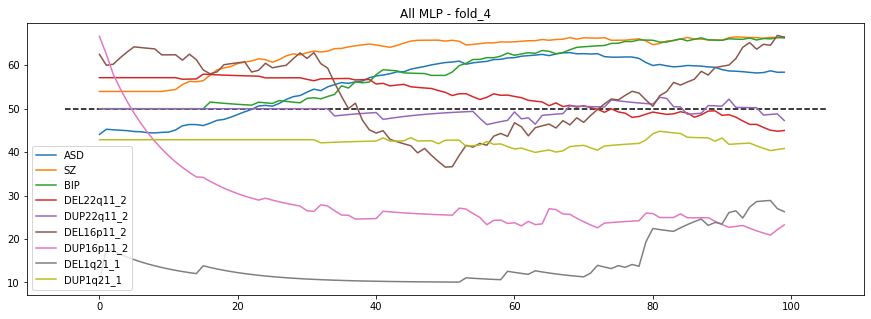

In [8]:
for i,df in enumerate(folds):
    plt.figure(figsize=(15,5))
    for case in cases:
        sns.lineplot(x=df.index,y=smooth(df[case]['Accuracy/test']),data=df[case],label=case)
    plt.title(f'All MLP - fold_{i}')
    plt.legend(loc="lower left")
    plt.hlines(50,-5,105,ls='--',color='black')
    #plt.show()
    plt.savefig(os.path.join(p_out,f'mlp_all_fold{i}.png'))

## Single task random splits

In [9]:
results = {}
for case in cases:
    p = os.path.join(p_parent,'single_MLP_rand',f'{case}')
    folds = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        files = [f for f in os.listdir(p_fold) if f[-4:]=='.csv']
        if len(files) != 0:
            file = files[0]
            df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
            folds.append(df)
    results[case] = folds

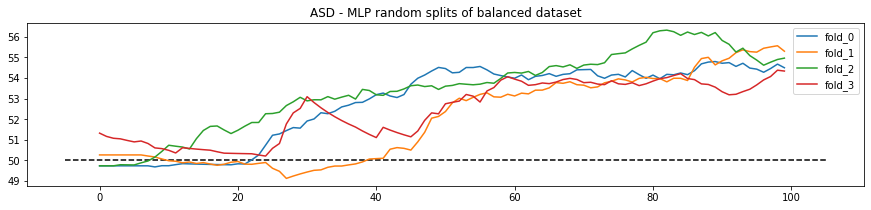

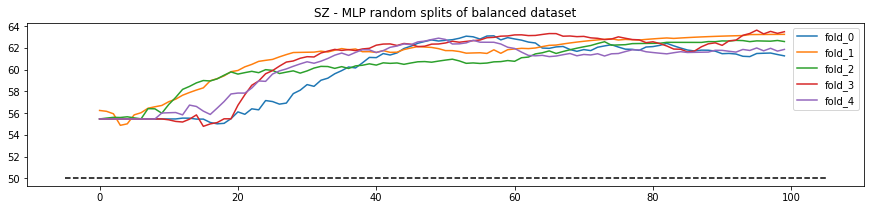

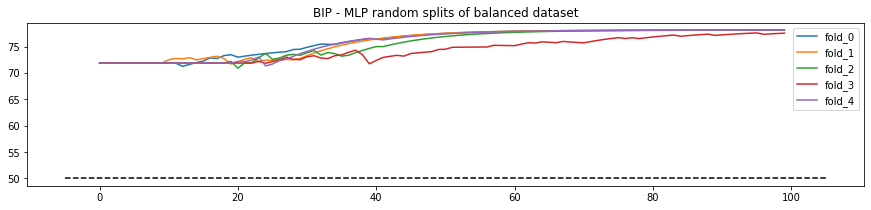

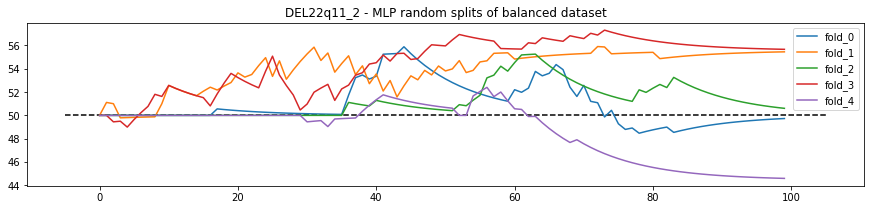

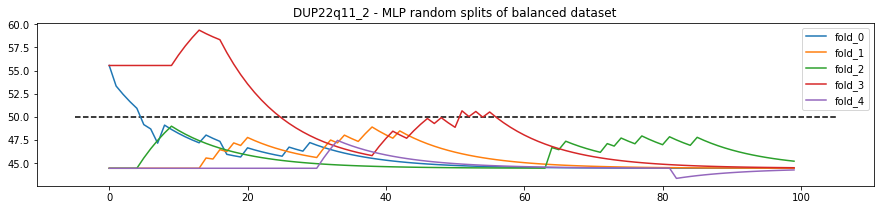

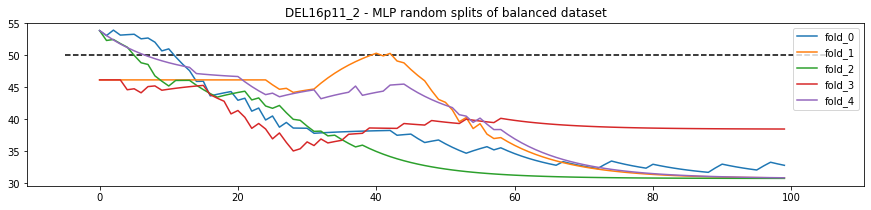

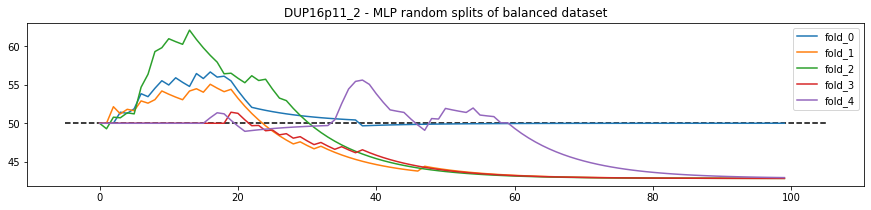

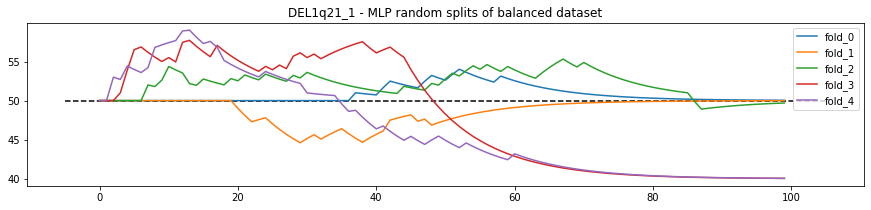

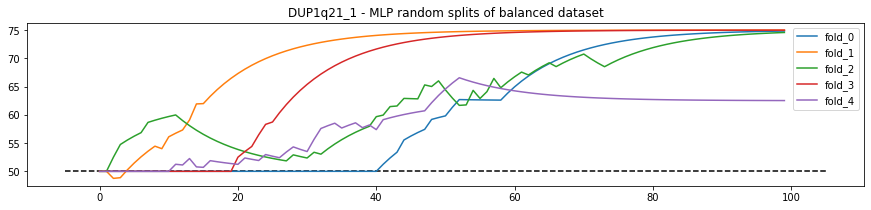

In [10]:
for case in results:
    plt.figure(figsize=(15,3))
    for i,df in enumerate(results[case]):
        sns.lineplot(x=df.index,y=smooth(df['Accuracy/test']),data=df,label=f'fold_{i}')
    plt.hlines(50,-5,105,ls='--',color='black')
    plt.title(f"{case} - MLP random splits of balanced dataset")
    plt.show()

# CNN
## Single task

In [11]:
results = {}
for case in cases:
    p = os.path.join(p_parent,'single_CNN',f'{case}')
    folds = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        folds.append(df)
    results[case] = folds

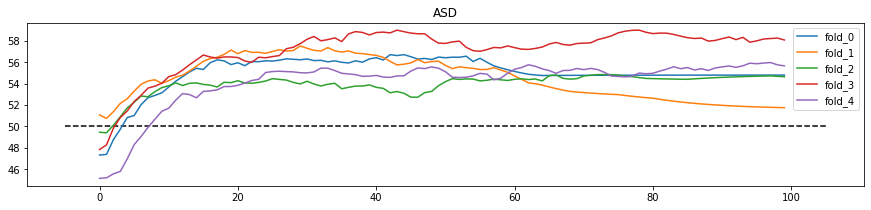

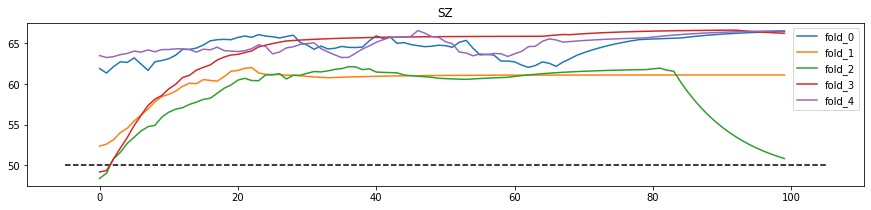

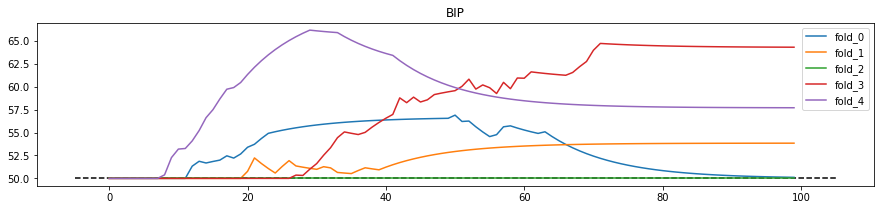

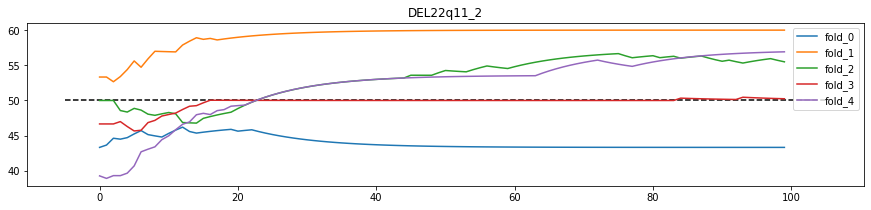

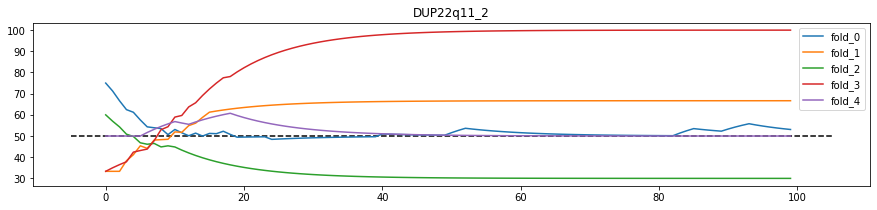

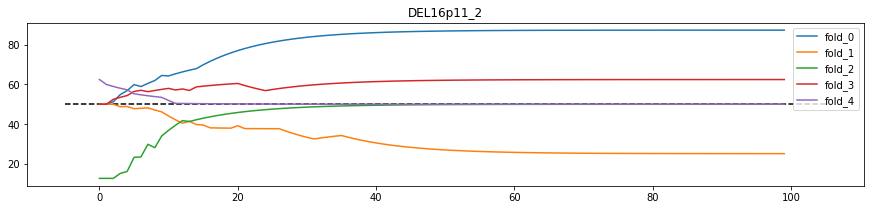

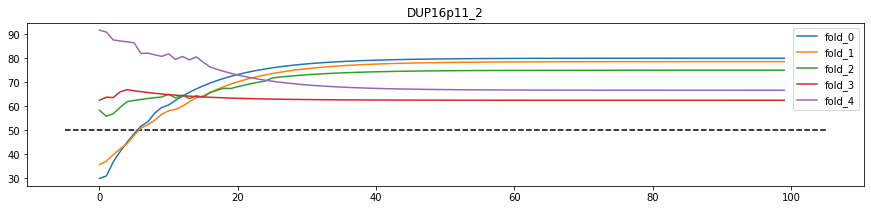

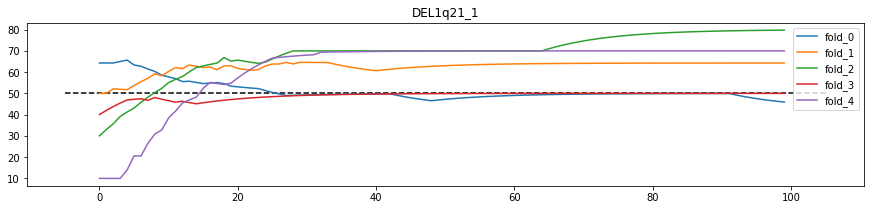

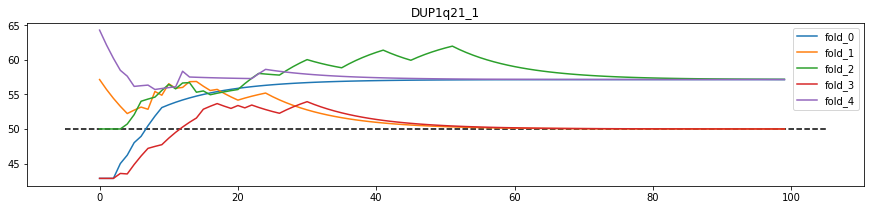

In [12]:
for case in results:
    plt.figure(figsize=(15,3))
    for i,df in enumerate(results[case]):
        sns.lineplot(x=df.index,y=smooth(df['Accuracy/test']),data=df,label=f'fold_{i}')
    plt.hlines(50,-5,105,ls='--',color='black')
    plt.title(case)
    plt.show()

## Multi task

In [13]:
p = os.path.join(p_parent,'all_CNN')
folds = []
for i in range(n_folds):
    p_fold = os.path.join(p,f'fold_{i}')
    file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
    df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])
    folds.append(df)

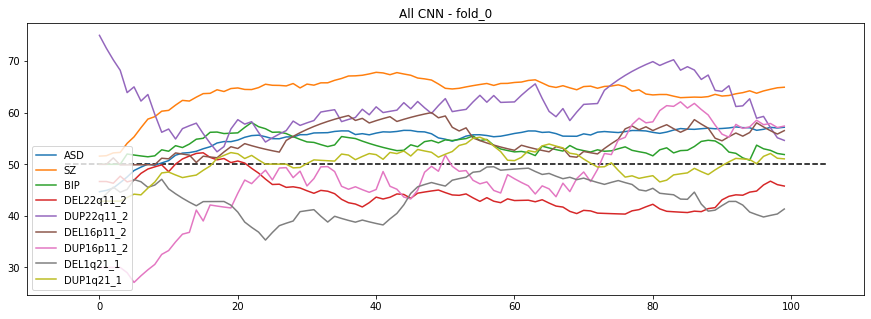

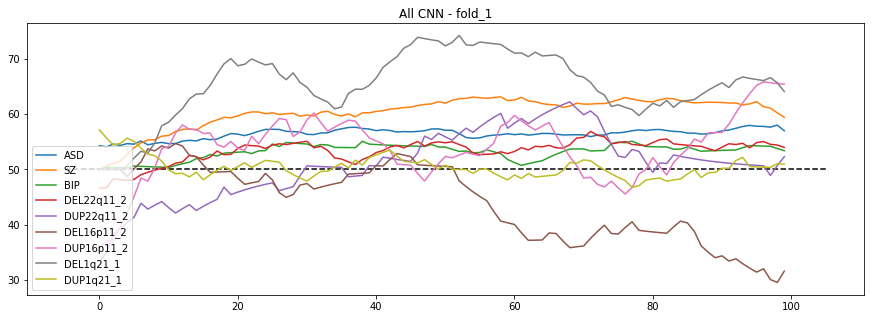

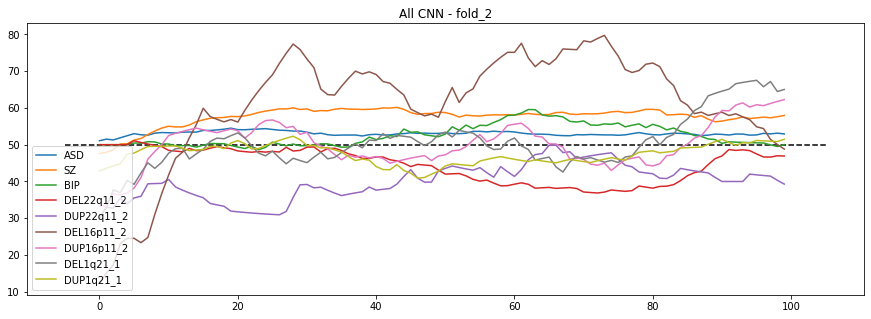

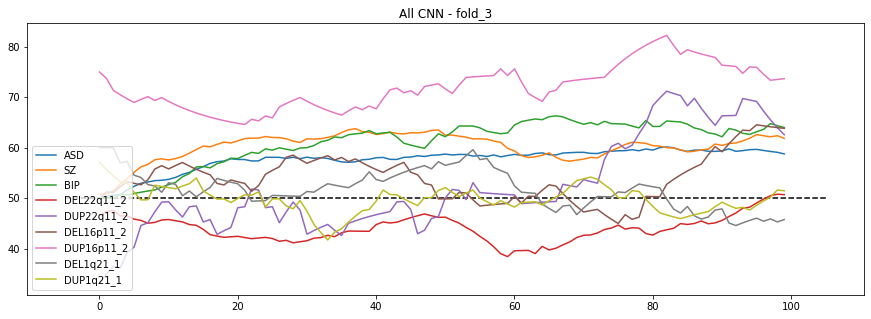

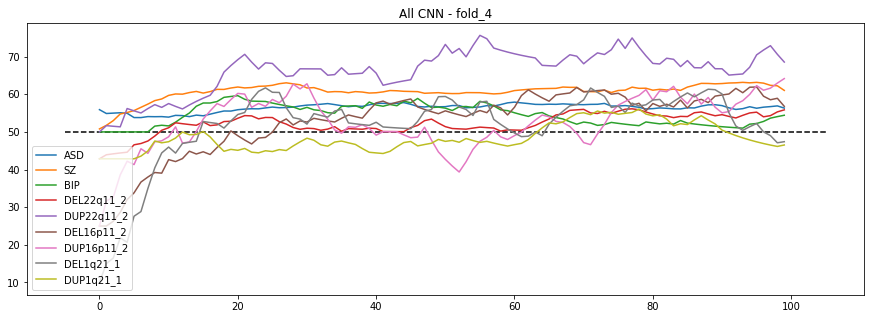

In [14]:
for i,df in enumerate(folds):
    plt.figure(figsize=(15,5))
    for case in cases:
        sns.lineplot(x=df.index,y=smooth(df[case]['Accuracy/test']),data=df[case],label=case)
    plt.hlines(50,-5,105,ls='--',color='black')
    plt.title(f'All CNN - fold_{i}')
    plt.legend(loc="lower left")
    plt.show()

## Single task random splits

In [15]:
results = {}
for case in cases:
    p = os.path.join(p_parent,'single_CNN_rand',f'{case}')
    folds = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        files = [f for f in os.listdir(p_fold) if f[-4:]=='.csv']
        if len(files) != 0:
            file = files[0]
            df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
            folds.append(df)
    results[case] = folds

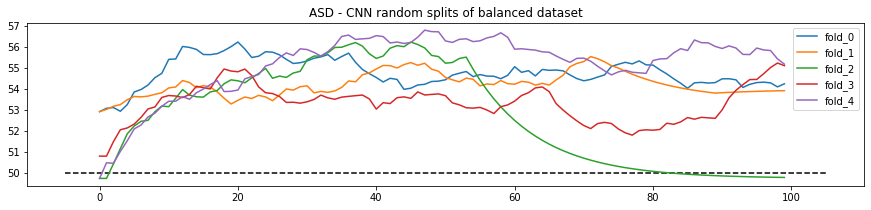

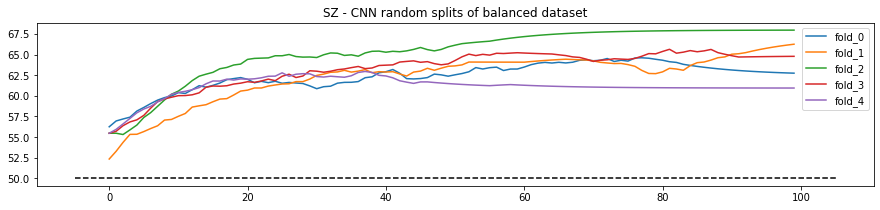

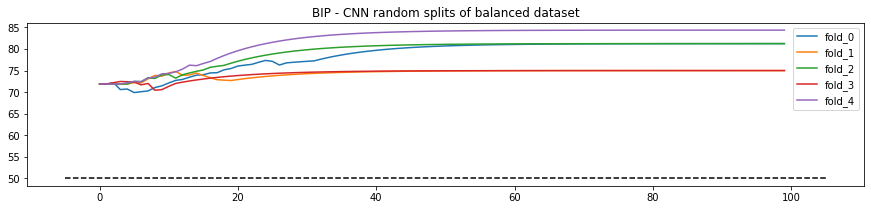

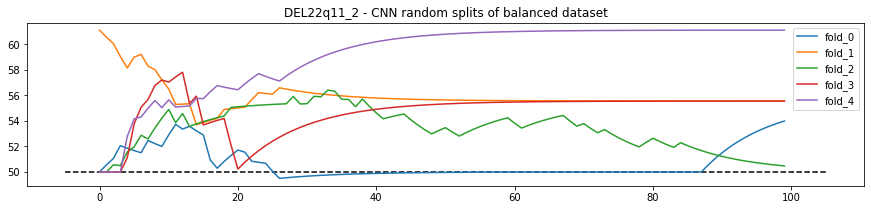

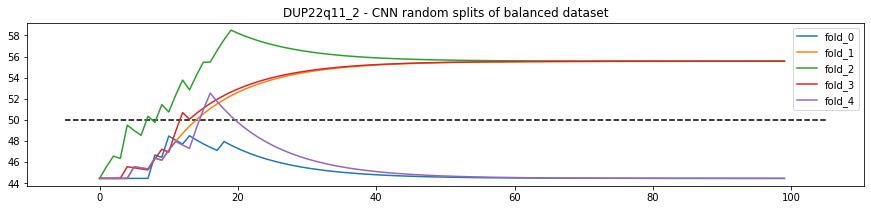

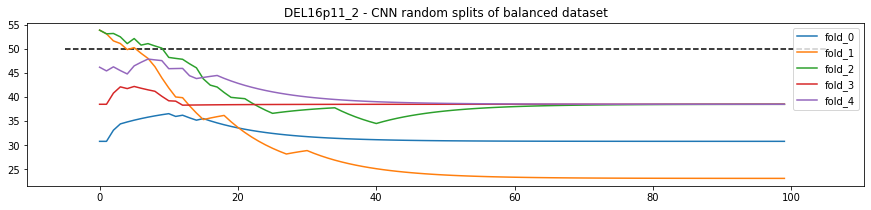

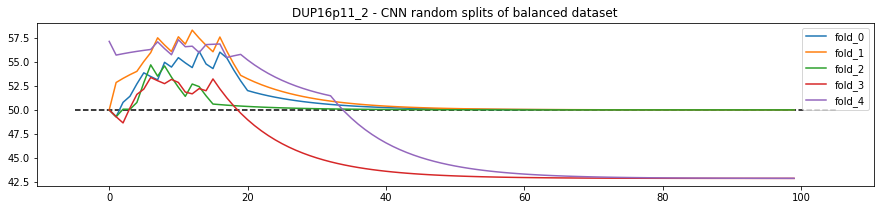

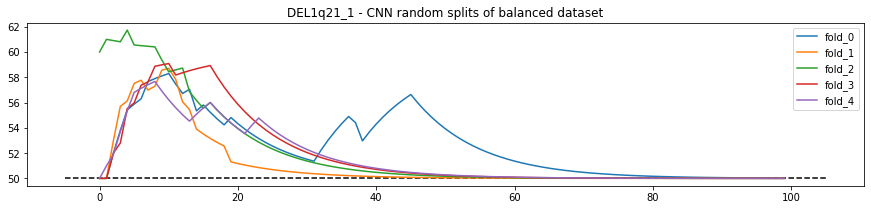

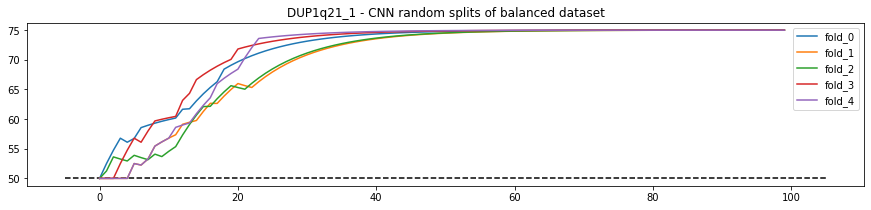

In [16]:
for case in results:
    plt.figure(figsize=(15,3))
    for i,df in enumerate(results[case]):
        sns.lineplot(x=df.index,y=smooth(df['Accuracy/test']),data=df,label=f'fold_{i}')
    plt.hlines(50,-5,105,ls='--',color='black')
    plt.title(f"{case} - CNN random splits of balanced dataset")
    plt.show()

# Reproduce courtois

In [17]:
p = os.path.join(p_parent,'reproduce_courtois')
folds = []
for i in range(n_folds):
    p_fold = os.path.join(p,f'run_{i}')
    file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
    df = pd.read_csv(os.path.join(p,f'run_{i}',file),index_col=0,header=[0,1])
    folds.append(df)

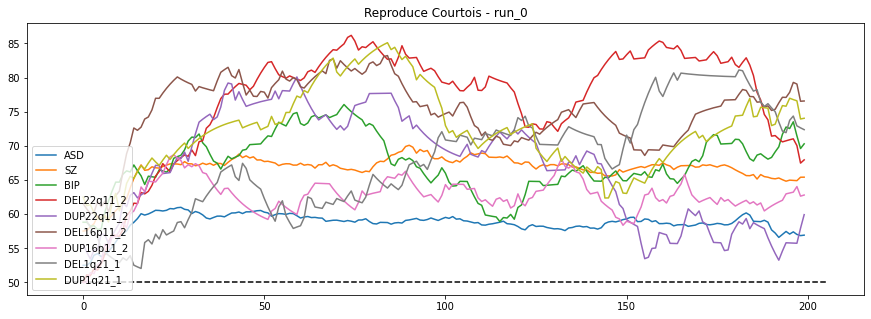

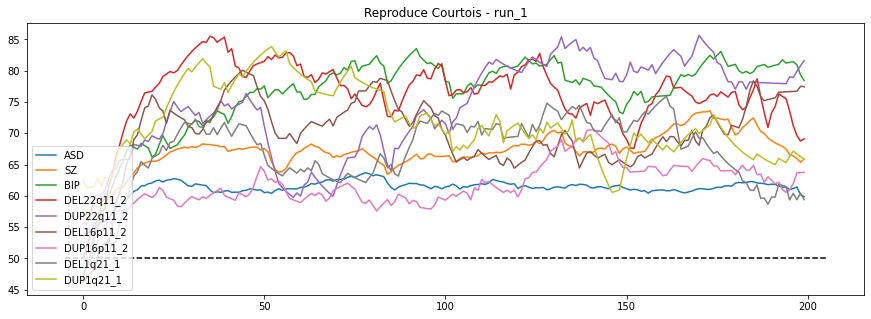

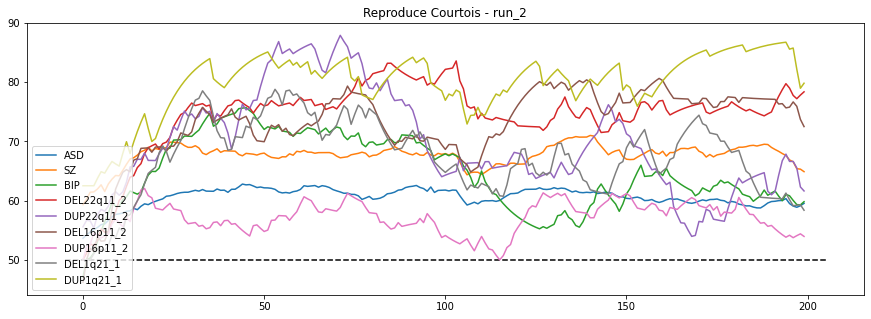

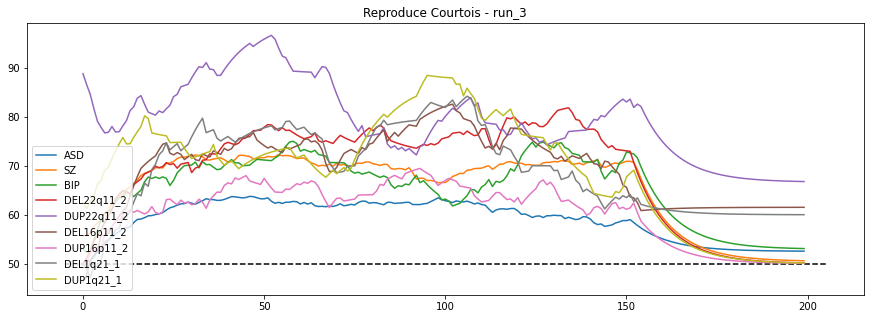

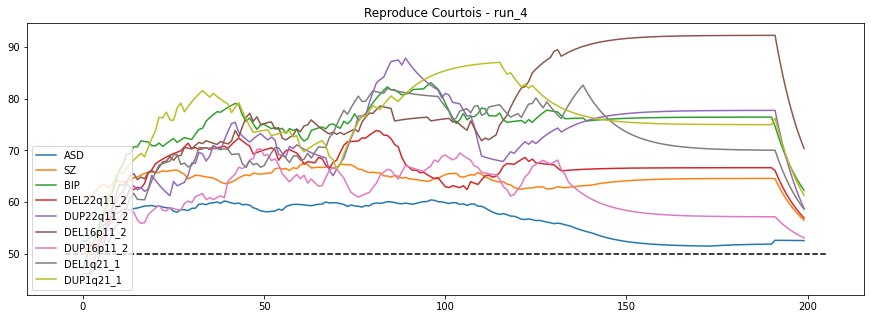

In [18]:
for i,df in enumerate(folds):
    plt.figure(figsize=(15,5))
    for case in cases:
        sns.lineplot(x=df.index,y=smooth(df[case]['Accuracy/test']),data=df[case],label=case)
    plt.title(f'Reproduce Courtois - run_{i}')
    plt.legend(loc="lower left")
    plt.hlines(50,-5,205,ls='--',color='black')
    #plt.show()
    plt.savefig(os.path.join(p_out,f'mlp_all_fold{i}.png'))